# PIMA Indian Diabetes Dataset Analysis

### Data Source
https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data

### Data Dictionary

For Each Attribute: (all numeric-valued)
   1. Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)
   9. Class variable (0 or 1) class value 1 is interpreted as "tested positive for
   diabetes"

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_extraction.text import CountVectorizer 
import warnings
warnings.filterwarnings("ignore")

### Data Ingestion

### Q.1. Load the PIMA Indian Diabetes file into Python DataFrame. The file can be accessed directly from the Data source URL

In [2]:
# Import the data into workspace

target_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
diabetes_df = pd.read_csv(target_url, header=None)

pima_df = diabetes_df.copy(deep=True)

In [3]:
pima_df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
print('No. of missing values in each feature of the dataset: ')
print(pima_df.isnull().sum())

No. of missing values in each feature of the dataset: 
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64


### Q.2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

In [5]:
# Adding column names

pima_df.columns = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

In [6]:
Y_labels = ['0', '1']

In [7]:
pima_df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
pima_df.tail()

,preg,plas,pres,skin,test,mass,pedi,age,class
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [9]:
from sklearn.preprocessing import Imputer

#Impute with 'mean' all 0 readings
imp_mean = Imputer(missing_values=0, strategy='mean', axis=0, verbose=0, copy=True)

pima_df['preg'] = imp_mean.fit_transform(pima_df['preg'].values.reshape(-1, 1))
pima_df['plas'] = imp_mean.fit_transform(pima_df['plas'].values.reshape(-1, 1))
pima_df['pres'] = imp_mean.fit_transform(pima_df['pres'].values.reshape(-1, 1))
pima_df['skin'] = imp_mean.fit_transform(pima_df['skin'].values.reshape(-1, 1))
pima_df['test'] = imp_mean.fit_transform(pima_df['test'].values.reshape(-1, 1))
pima_df['mass'] = imp_mean.fit_transform(pima_df['mass'].values.reshape(-1, 1))
pima_df['pedi'] = imp_mean.fit_transform(pima_df['pedi'].values.reshape(-1, 1))
pima_df['age'] = imp_mean.fit_transform(pima_df['age'].values.reshape(-1, 1))

pima_df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6.000000,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1
1,1.000000,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0
2,8.000000,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1
3,1.000000,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0
4,4.494673,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1


In [10]:
pima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
preg     768 non-null float64
plas     768 non-null float64
pres     768 non-null float64
skin     768 non-null float64
test     768 non-null float64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null float64
class    768 non-null int64
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


### Q.3. Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes)?

In [11]:
# Summary statistics of numeric data
pima_df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.494673,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,2.975395,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,4.494673,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


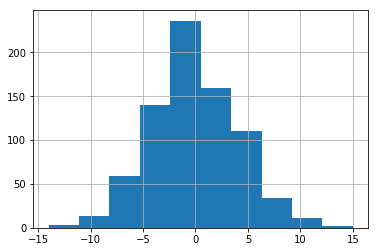

In [12]:
plt.figure()
pima_df['preg'].diff().hist()

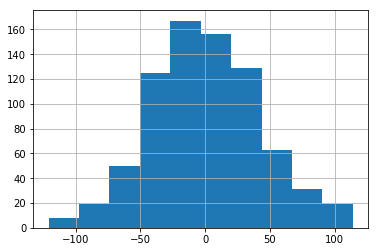

In [13]:
pima_df['plas'].diff().hist()

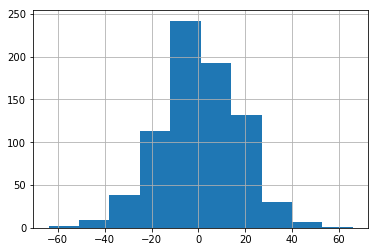

In [14]:
pima_df['pres'].diff().hist()

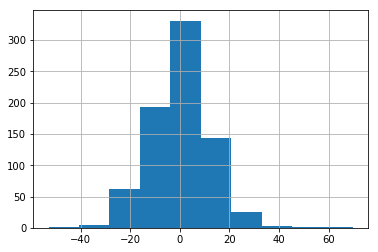

In [15]:
pima_df['skin'].diff().hist()

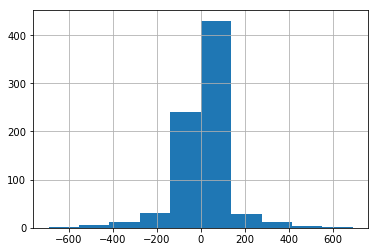

In [16]:
pima_df['test'].diff().hist()

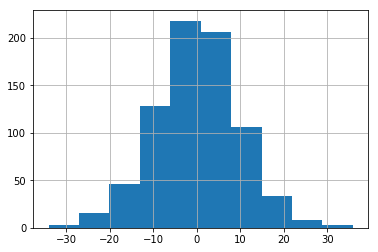

In [17]:
pima_df['mass'].diff().hist()

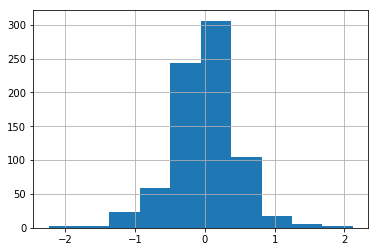

In [18]:
pima_df['pedi'].diff().hist()

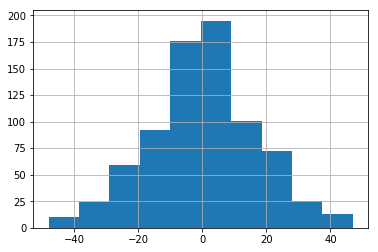

In [19]:
pima_df['age'].diff().hist()

### Obervation:
**Variables like 'test' and 'age' are right skewed. There is lot of variation in 'plas' and 'test' variables.**

### Data Visualisation:

### Q.4. Using bivariate analysis check for useful relationships between attributes and attributes and the target class.

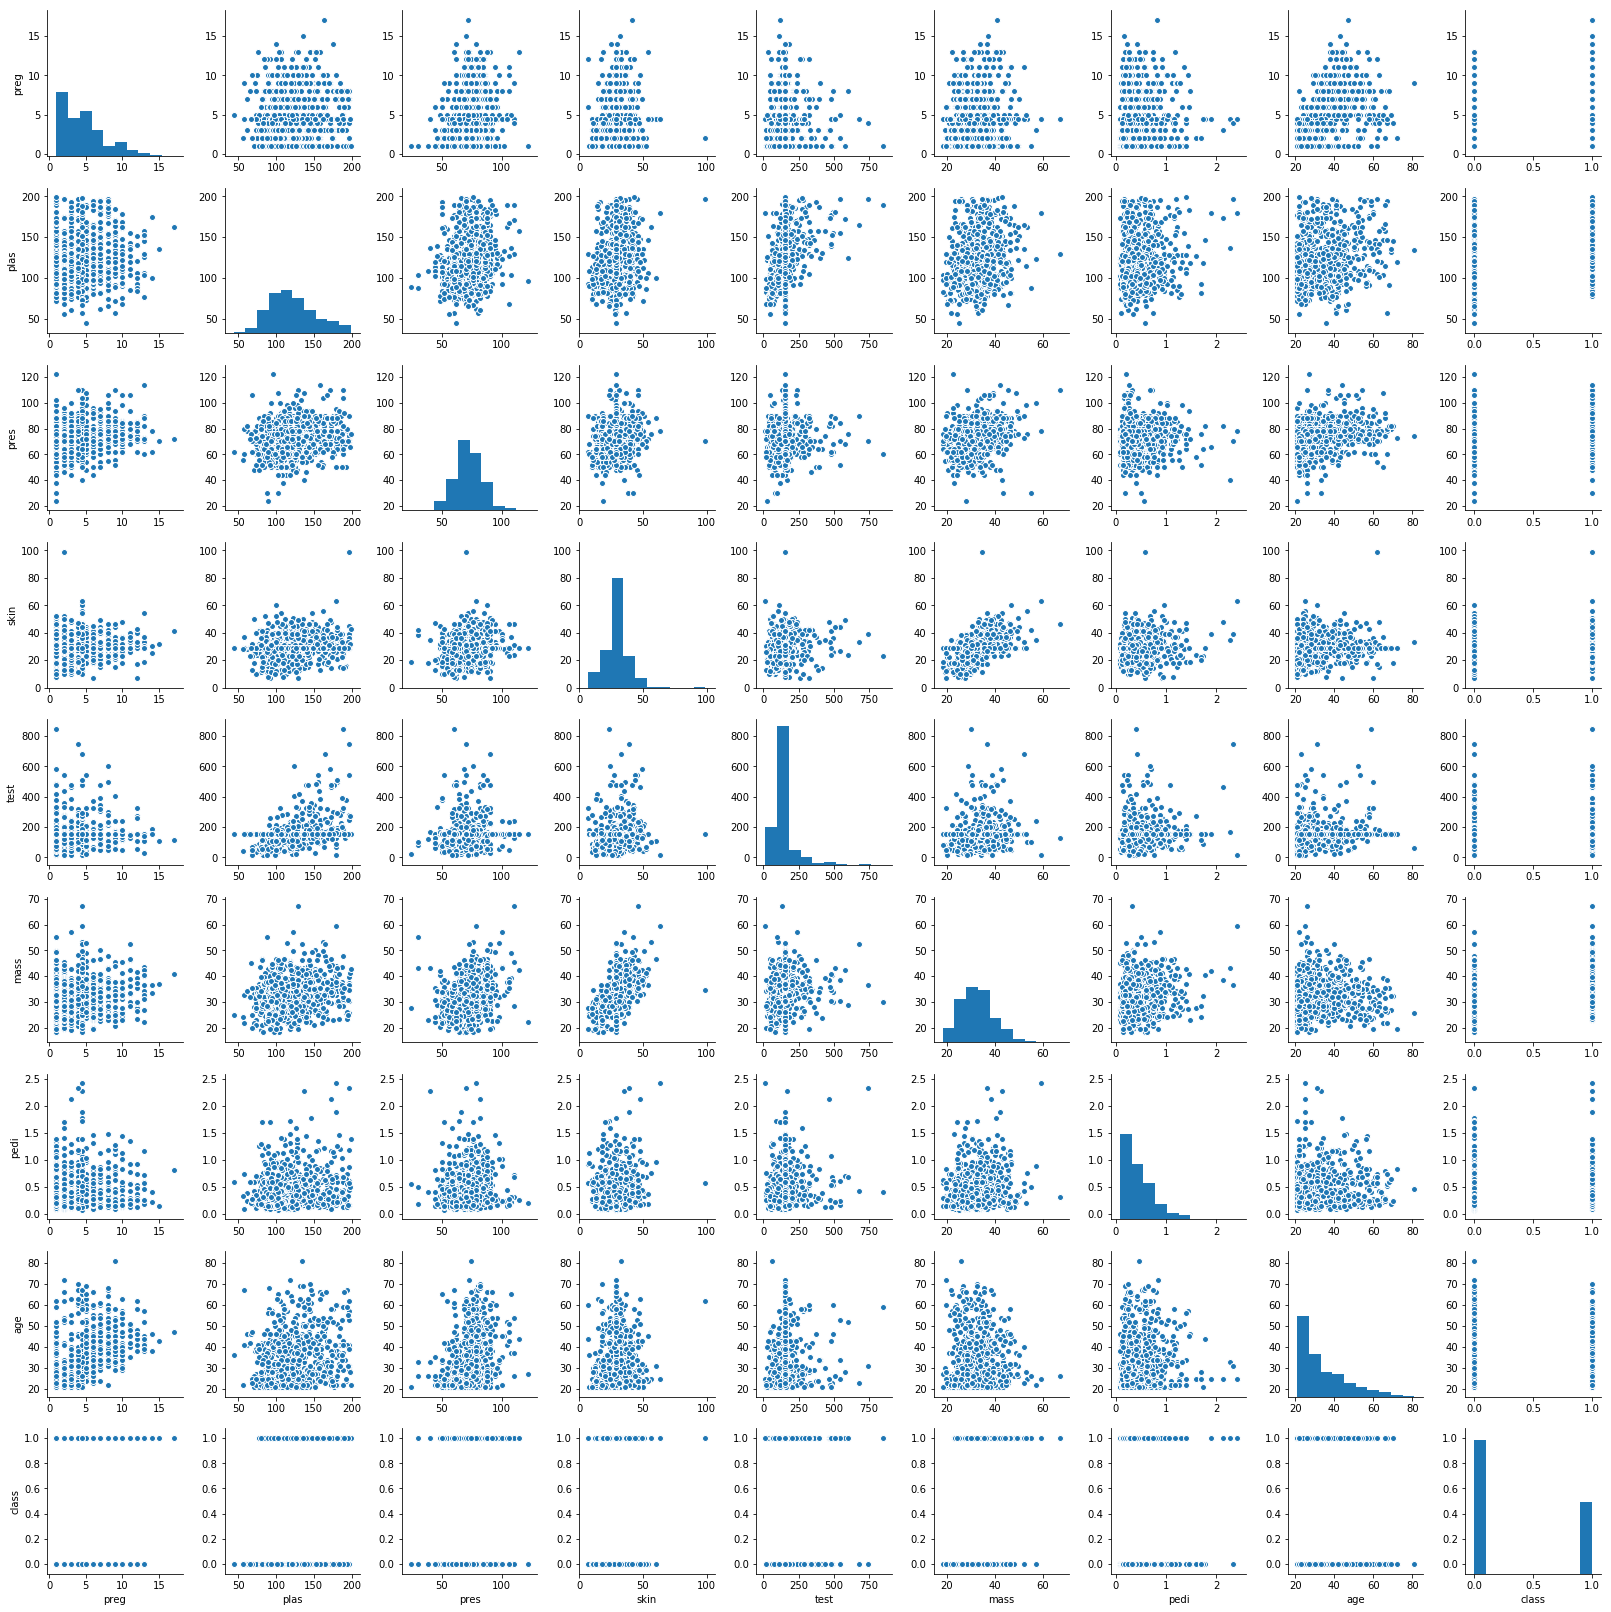

In [20]:
sns.pairplot(pima_df)

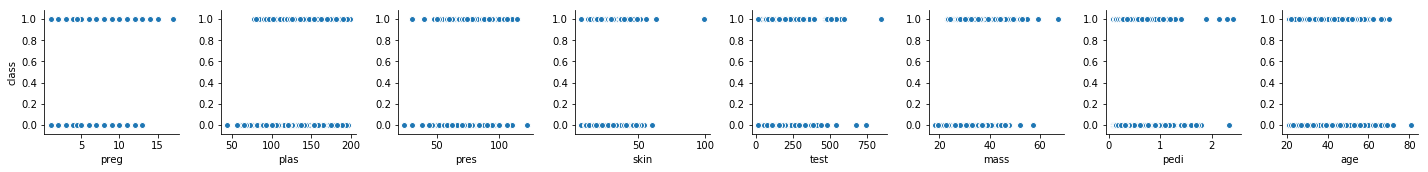

In [21]:
sns.pairplot(pima_df, x_vars=['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age'], y_vars='class')

### Observation: 
**There is no strong linear relationship among the variables. Few variable pairs like ('mass' and 'skin'), ('preg' and 'age') have a weak positive linear relationship.**

In [22]:
#Correlation matrix
pima_df.corr()

,preg,plas,pres,skin,test,mass,pedi,age,class
preg,1.000000,0.154290,0.259117,0.131819,0.068077,0.110590,-0.005658,0.511662,0.248263
plas,0.154290,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534,0.492928
pres,0.259117,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595,0.166074
skin,0.131819,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872,0.215299
test,0.068077,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734,0.214411
mass,0.110590,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519,0.311924
pedi,-0.005658,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561,0.173844
age,0.511662,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000,0.238356
class,0.248263,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,1.000000


In [23]:
pima_df.corr().abs() > 0.6

,preg,plas,pres,skin,test,mass,pedi,age,class
preg,True,False,False,False,False,False,False,False,False
plas,False,True,False,False,False,False,False,False,False
pres,False,False,True,False,False,False,False,False,False
skin,False,False,False,True,False,False,False,False,False
test,False,False,False,False,True,False,False,False,False
mass,False,False,False,False,False,True,False,False,False
pedi,False,False,False,False,False,False,True,False,False
age,False,False,False,False,False,False,False,True,False
class,False,False,False,False,False,False,False,False,True


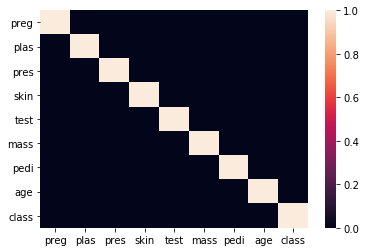

In [24]:
sns.heatmap(pima_df.corr().abs() > 0.6)

### Observation:
By observation from the heatmap of correlation matrix: **There is no strong linear relationship among the variables in the dataset**

In [25]:
# Standardise data before building the model
pima_df.apply(lambda x: (x-np.mean(x))/(np.std(x)))
pima_df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6.000000,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1
1,1.000000,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0
2,8.000000,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1
3,1.000000,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0
4,4.494673,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1


### Q.5. Split the pima_df into training and test set in the ratio of 70:30 (Training:Test)

## Splitting data into training and testing set - MANUALLY

In [26]:
# Splitting 70% of the records from the dataset for training and 30% for testing
# MANUAL splitting
X_train_1 = pima_df.head(538) # Up to the last initial training set row
X_test_1 = pima_df.tail(230) # Past the last initial training set row

# capture the target column ('class') into separate vectors for training set and test set
Y_train_1 = X_train_1.pop('class')
Y_test_1 = X_test_1.pop('class')

### Q.6. Create the model using “entropy” method of reducing the entropy and fit it to training data

In [27]:
dt_model_1 = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 5, random_state=5)

In [28]:
dt_model_1.fit(X_train_1, Y_train_1)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=5,
            splitter='best')

In [29]:
dt_model_1.score(X_test_1 , Y_test_1)

0.77826086956521734

In [30]:
Y_pred_1 = dt_model_1.predict(X_test_1)

### Crosstab for Actual vs Predicted labels: 0=Non-Diabetic, 1=Diabetic

In [31]:
my_tab1 = pd.crosstab(index=np.array(Y_test_1), columns=Y_pred_1, rownames=['Actual'], colnames=['Predicted'])
my_tab1

Predicted,0,1
Actual,,
0,122,29
1,22,57


### Obsservation:
1. 122 patients are actually non-diabetic and are correctly predicted as non-diabetic
2. 29 patients are actually non-diabetic but are wrongly predicted as diabetic
3. 22 patients are actually diabetic but are wrongly predicted as non-diabetic
4. 57 patients are actually diabetic and are correctly predicted as diabetic

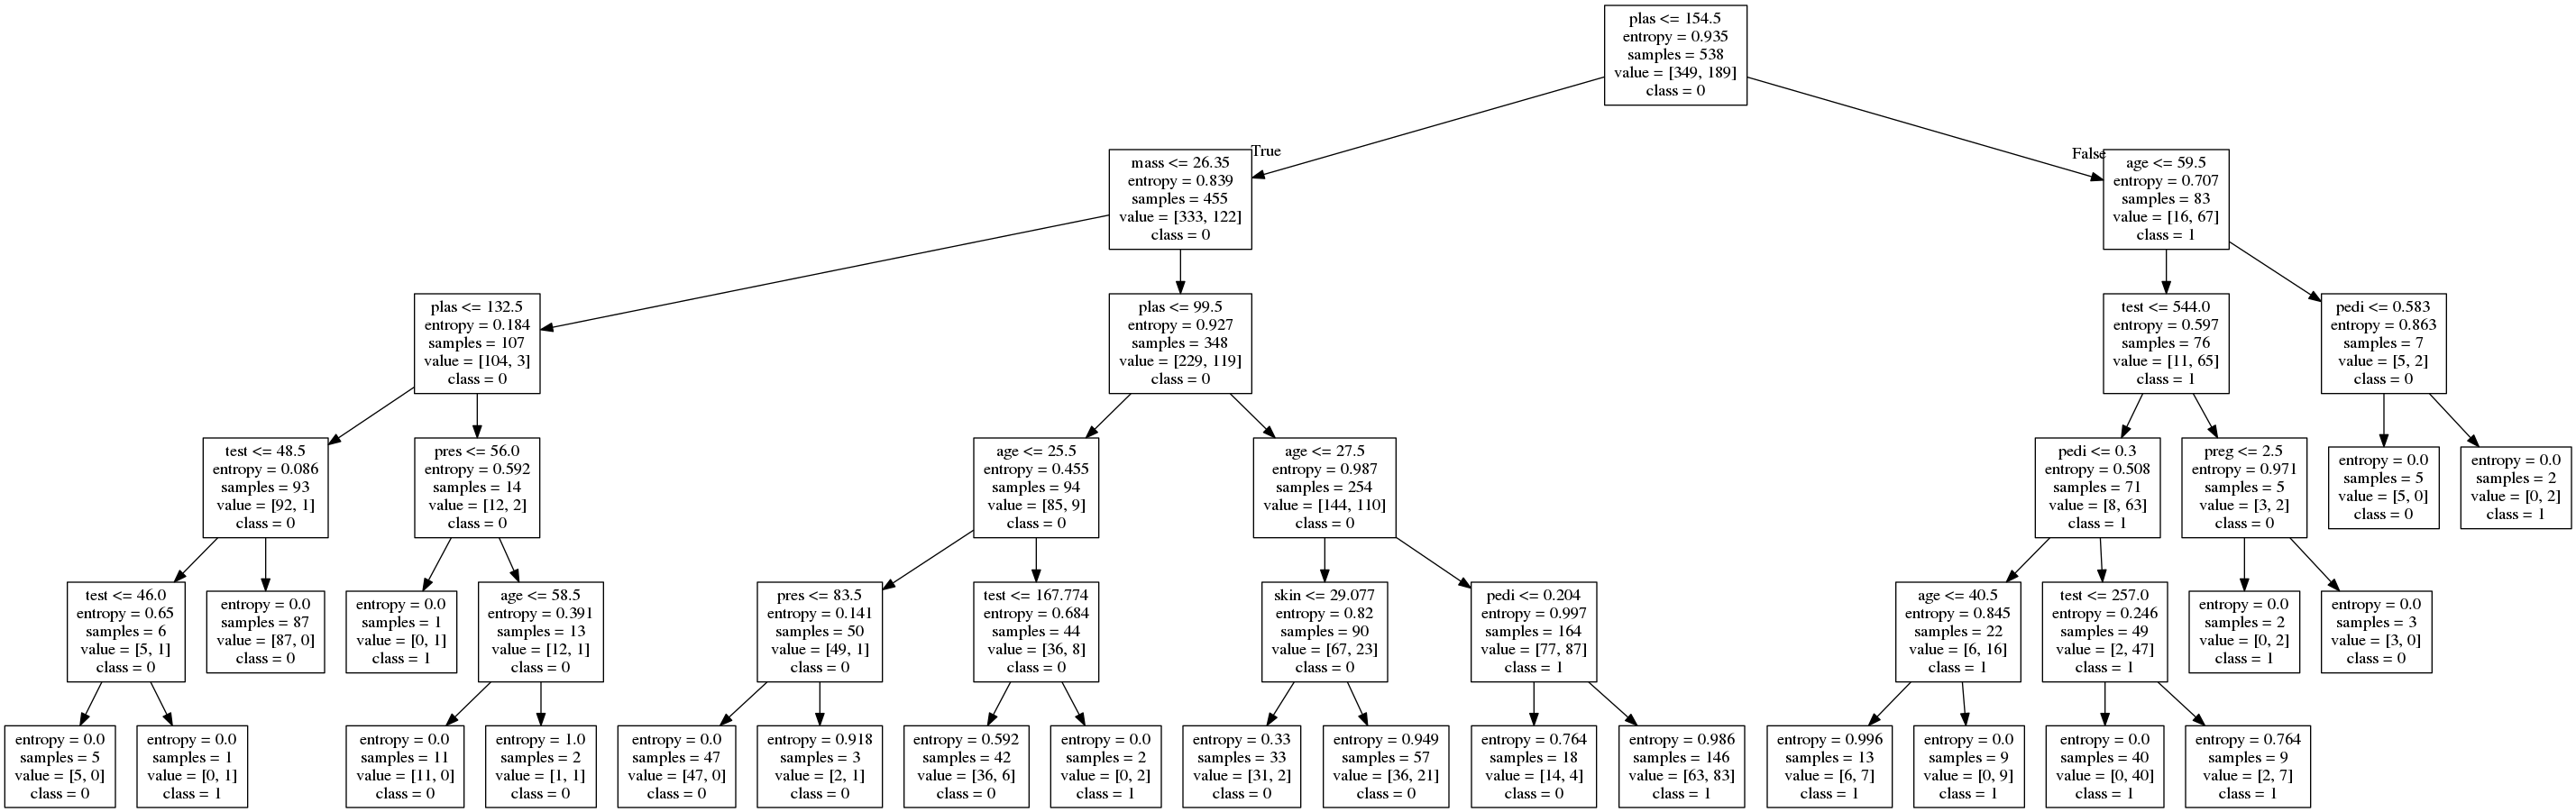

In [32]:
from IPython.display import Image  
import pydotplus as pydot
dot_data = tree.export_graphviz(dt_model_1, out_file=None, feature_names = list(X_train_1), class_names = list(Y_labels))
graph = pydot.graph_from_dot_data(dot_data)  
Image(graph.create_png())  

## Splitting data into training and testing set - Using RANDOM_STATE variable

In [33]:
# Splitting 70% of the records from the dataset for training and 30% for testing by setting random_state=5
from sklearn.model_selection import train_test_split
Y = pima_df['class']
X = pima_df.drop(['class'], axis=1)

X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(X, Y, test_size=0.30, random_state=5)

In [34]:
dt_model_2 = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 5)

In [35]:
dt_model_2.fit(X_train_2, Y_train_2)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [36]:
dt_model_2.score(X_test_2, Y_test_2)

0.77056277056277056

In [37]:
Y_pred_2 = dt_model_2.predict(X_test_2)

### Crosstab for Actual vs Predicted labels: 0=Non-Diabetic, 1=Diabetic

In [38]:
my_tab2 = pd.crosstab(index=np.array(Y_test_2), columns=Y_pred_2, rownames=['Actual'], colnames=['Predicted'])
my_tab2

Predicted,0,1
Actual,,
0,140,20
1,33,38


### Obsservation:
1. 140 patients are actually non-diabetic and are correctly predicted as non-diabetic
2. 20 patients are actually non-diabetic but are wrongly predicted as diabetic
3. 33 patients are actually diabetic but are wrongly predicted as non-diabetic
4. 38 patients are actually diabetic and are correctly predicted as diabetic

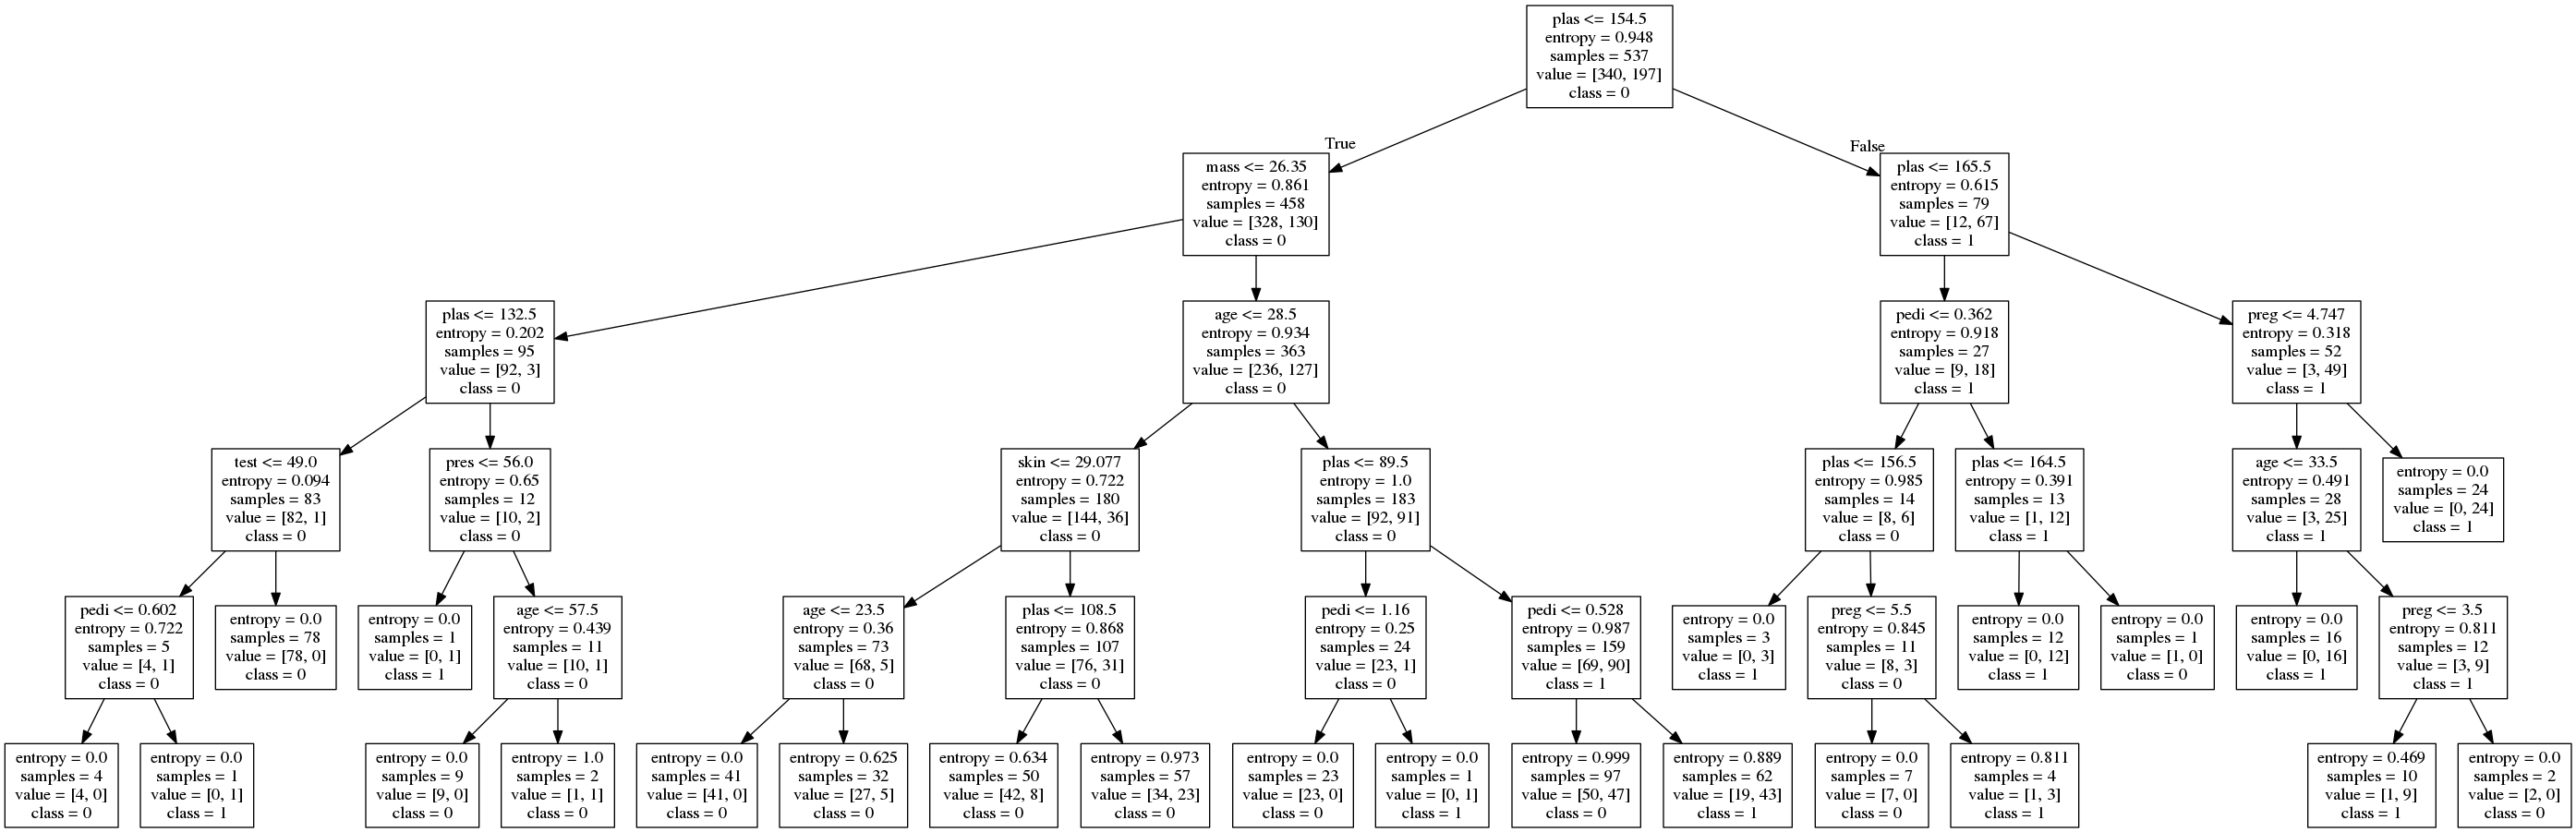

In [39]:
from IPython.display import Image  
import pydotplus as pydot
dot_data = tree.export_graphviz(dt_model_2, out_file=None, feature_names = list(X_train_2), class_names = list(Y_labels))
graph = pydot.graph_from_dot_data(dot_data)  
Image(graph.create_png())  

### Q.9. Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy. How does regularization help? Implement the same using Random Forest.

**Regularisation (as any means to prevent overfit) helps in model performance.**
In broader sense, Regularization for Trees is done by:
limiting max. depth of trees
ensembles / bag more than just 1 tree
set stricter stopping criterion on when to split a node further (e.g. min gain, number of samples etc.)

In [40]:
# list of values to try for max_depth
max_depth_range = range(1, 21)
# list to store the average RMSE for each value of max_depth
RMSE_scores = []
# use 10‐fold cross‐validation with each value of max_depth
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import cross_val_score
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=5)
    MSE_scores = cross_val_score(treereg, X, Y, cv=10, scoring='mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

Text(0,0.5,'RMSE (lower is better)')

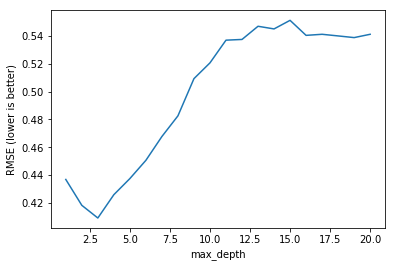

In [41]:
# plot max_depth (x‐axis) versus RMSE (y‐axis)
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')

In [42]:
# show the best RMSE and the corresponding max_depth
sorted(zip(RMSE_scores, max_depth_range))[0]

(0.40923655152282779, 3)

In [43]:
# Splitting 70% of the records from the dataset for training and 30% for testing by setting random_state=5
from sklearn.model_selection import train_test_split
Y1 = pima_df['class']
X1 = pima_df.drop(['class'], axis=1)

X_train_3, X_test_3, Y_train_3, Y_test_3 = train_test_split(X1, Y1, test_size=0.30, random_state=5)

In [44]:
# max_depth=3 was best, so fit a tree using that parameter
dt_model_3 = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 5)
dt_model_3.fit(X_train_3, Y_train_3)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [45]:
dt_model_3.score(X_test_3, Y_test_3)

0.76623376623376627

In [46]:
Y_pred_3 = dt_model_3.predict(X_test_3)

### Crosstab for Actual vs Predicted labels: 0=Non-Diabetic, 1=Diabetic

In [48]:
my_tab3 = pd.crosstab(index=np.array(Y_test_3), columns=Y_pred_3, rownames=['Actual'], colnames=['Predicted'])
my_tab3

Predicted,0,1
Actual,,
0,139,21
1,33,38


### Obsservation:
1. 139 patients are actually non-diabetic and are correctly predicted as non-diabetic
2. 21 patients are actually non-diabetic but are wrongly predicted as diabetic
3. 33 patients are actually diabetic but are wrongly predicted as non-diabetic
4. 38 patients are actually diabetic and are correctly predicted as diabetic

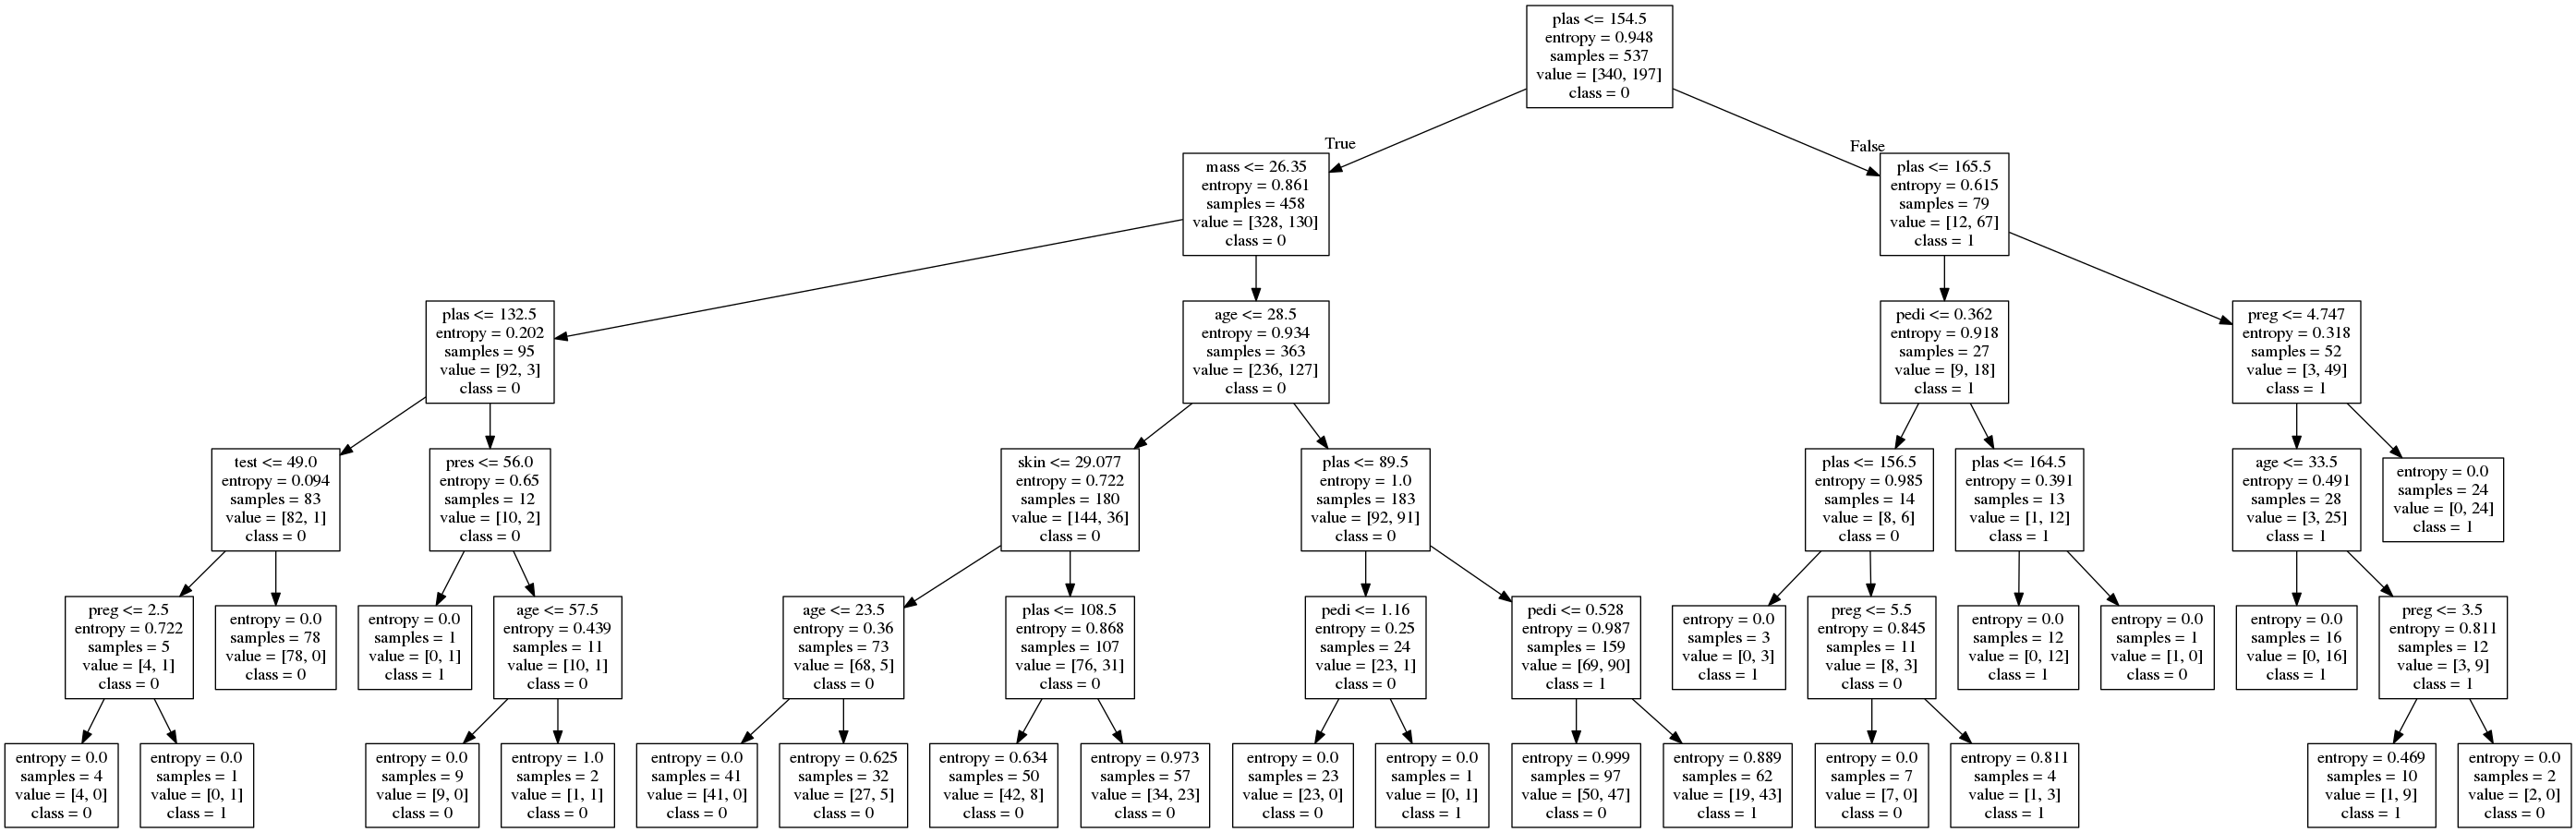

In [49]:
from IPython.display import Image  
import pydotplus as pydot
dot_data = tree.export_graphviz(dt_model_3, out_file=None, feature_names = list(X_train_3), class_names = list(Y_labels))
graph = pydot.graph_from_dot_data(dot_data)  
Image(graph.create_png())  

### Q.10. Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result?

**For a dataset, Optimal number of trees = sqrt(number of rows * number of columns)/number of cpu available**

Usually after 128 number of trees there is no significant improvement in the Random Forest model.

In [52]:
# Splitting 70% of the records from the dataset for training and 30% for testing by setting random_state=5
from sklearn.model_selection import train_test_split
Y2 = pima_df['class']
X2 = pima_df.drop(['class'], axis=1)

X_train_4, X_test_4, Y_train_4, Y_test_4 = train_test_split(X2, Y2, test_size=0.30, random_state=5)

In [53]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state = 5) # Create random forest object
rf_model.fit(X_train_4, Y_train_4)
rf_predict_train = rf_model.predict(X_train_4)
# training metrics
print("Accuracy: {0:.4f} for traning set".format(metrics.accuracy_score(Y_train_4, rf_predict_train)))
rf_predict_test = rf_model.predict(X_test_4)
# training metrics
print("Accuracy: {0:.4f} for testing set".format(metrics.accuracy_score(Y_test_4, rf_predict_test)))
print("{0}".format(metrics.confusion_matrix(Y_test_4, rf_predict_test, labels=[1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(Y_test_4, rf_predict_test, labels=[1, 0]))

Accuracy: 0.9795 for traning set
Accuracy: 0.7662 for testing set
[[ 46  25]
 [ 29 131]]

Classification Report
             precision    recall  f1-score   support

          1       0.61      0.65      0.63        71
          0       0.84      0.82      0.83       160

avg / total       0.77      0.77      0.77       231

